In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
import sbm
import community

# Demonstrating the implemented Stochastic Block Model

Generate some simulated data

In [3]:
np.random.seed(1232132313)
A, nodes, p_clust = sbm.gen_sbm(30, 2)

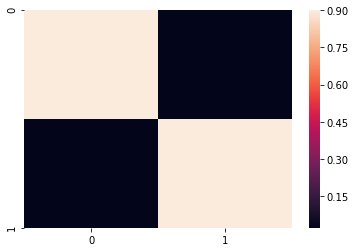

In [4]:
sns.heatmap(p_clust)

In [5]:
G = nx.from_numpy_matrix(A)

/home/jason/miniconda3/envs/CMSC828O/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


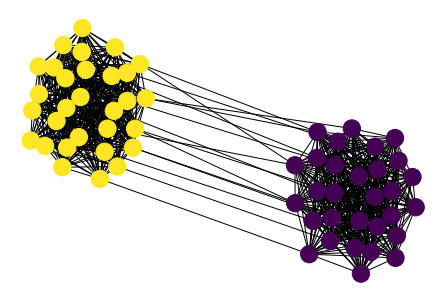

In [6]:
nx.draw(G, node_color=nodes)

and the corresponding adjacency matrix...

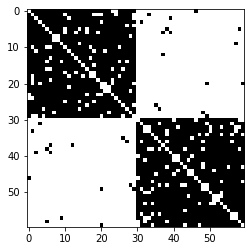

In [7]:
plt.imshow(1 - A, cmap='gray')

Louvain clustering is a good sanity check. Louvain clustering easily finds the correct clustering.

In [8]:
louvain_communities = community.best_partition(G)

In [9]:
louvain_labels = [louvain_communities[i] for i in range(len(nodes))]

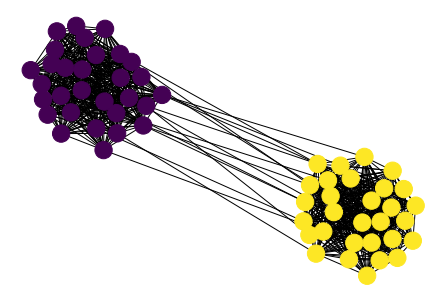

In [10]:
nx.draw(G, node_color=louvain_labels)

# Fitting the SBM to toy data

The SBM is *highly* sensitive to initialization - this is also reported in the paper for `blockmodels`. So in our implementation, we support both random initialization and initialization with spectral clustering.

In [11]:
model = sbm.SBM(A, 2, max_iters=10, max_e_iters=50, tol=10e-8, init='random')
model.fit(True)
model.Z

[ITER] 0 NLL=1249.174745
[ITER] 1 NLL=1249.164346
[ITER] 2 NLL=1249.162529
[ITER] 3 NLL=1249.162187
[ITER] 4 NLL=1249.162123
[ITER] 5 NLL=1249.162111
[ITER] 6 NLL=1249.162109
[ITER] 7 NLL=1249.162109
[ITER] 8 NLL=1249.162108
	Converged...


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Spectral clustering is a *hard* clustering. To enable variational EM, we move probability mass away from initialized clusters (as computed by spectral clustering).

In [12]:
model = sbm.SBM(A, 2, max_iters=10, max_e_iters=50, tol=10e-8, init='spectral')
model.fit(True)
model.Z

[ITER] 0 NLL=404.687360
[ITER] 1 NLL=404.687360
	Converged...


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/home/jason/miniconda3/envs/CMSC828O/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


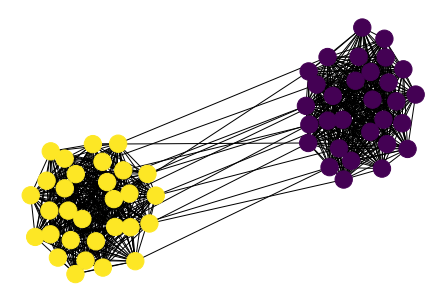

In [13]:
nx.draw(G, node_color=model.MAP_Z())

Our model learns reasonable inter-cluster interaction probabilities and cluster assignment probabilities.

In [14]:
p_clust

array([[0.9       , 0.02171525],
       [0.02171525, 0.9       ]])

In [15]:
model.theta

array([[0.89655172, 0.01777778],
       [0.01777778, 0.90344827]])

In [16]:
model.alpha

array([0.5, 0.5])

# Sanity check for ICL criterion.

As a sanity check, we also see that the ICL criterion prefers the correct number of clusters for our small example.

In [17]:
model = sbm.SBM(A, 2, max_iters=10, max_e_iters=50, tol=10e-8, init='spectral')
# model.theta = np.asarray([[0.3       , 0.5],
#                          [0.5, 0.3  ]])
model.fit(False)
model.ICL()

-414.89801094277453

In [18]:
model = sbm.SBM(A, 3, max_iters=10, max_e_iters=50, tol=10e-8, init='spectral')
# model.theta = np.asarray([[0.3       , 0.5],
#                          [0.5, 0.3  ]])
model.fit(False)
model.ICL()

-424.5301466707442